# EDA for casp11 Dataset
Goal: Perform exploratory data analysis (EDA) on the casp11 dataset to understand the dataset format and the frequency of secondary structure elements in the dataset.

In [11]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
file_dir = '../Data/Original/casp11_dataset.csv'
df_ori = pd.read_csv(file_dir, sep=',', header=0)
df_ori

,pdb,aa,chain,q3,q8,asa,rsa,phi,psi
0,4R7F,Q,A,C,C,192.0,0.853333,360.0,165.2
1,4R7F,V,A,C,C,91.0,0.522989,-85.0,139.7
2,4R7F,K,A,B,B,119.0,0.504237,105.8,142.1
3,4R7F,F,A,C,C,25.0,0.104167,102.8,132.4
4,4R7F,F,A,C,C,81.0,0.337500,149.1,153.5
...,...,...,...,...,...,...,...,...,...
16227,4UXE,K,C,B,E,82.0,0.347458,107.2,147.3
16228,4UXE,F,C,B,E,86.0,0.358333,-95.5,142.8
16229,4UXE,E,C,B,E,78.0,0.349776,135.8,122.0
16230,4UXE,W,C,B,E,105.0,0.368421,-72.5,137.8


In [13]:
# Group the data by PDB code
grouped = df_ori.groupby('pdb')

processed_data = []

for _, group in grouped:
    # Combine the amino acid and secondary structure sequences
    combined_aa = ''.join(group['aa'].tolist())
    combined_q8 = ''.join(group['q8'].tolist())
    combined_q3 = ''.join(group['q3'].tolist())
    protein_length = len(combined_aa)

    # Append the processed data to the list
    processed_data.append({
        'seq': combined_aa,
        'dssp8': combined_q8,
        'dssp3': combined_q3
    })

df = pd.DataFrame(processed_data)

In [14]:
df

,seq,dssp8,dssp3
0,GHMKFTDQQIGVLAGLAISPEWLKQNIAANQLVYGIVKPSDTVPAG...,CCCSSCHHHHHHHHHHTSCHHHHHHHHHTTCEEEEECSTTSSCCSS...,CCCCCCHHHHHHHHHHCCCHHHHHHHHHCCCBBBBBCCCCCCCCCC...
1,QDTFIAAVYEHAAILPNATLTPVSREEALALMNRNLDILEGAITSA...,CCEEEEEEEEBCCCCCCCCSSCCCHHHHHHHHHHHHHHHHHHHHHH...,CCBBBBBBBBBCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHH...
2,PSKTSLDIAEELQNDKGVSFAFQAREEELGAFTKRTLFAYSGDGLT...,CCSEEEEEEEEEECTTSCEEEEEEEEEEETTEEEEEEEEEESSCBS...,CCCBBBBBBBBBBCCCCCBBBBBBBBBBBCCBBBBBBBBBBCCCBC...
3,NPEALTVAATEVRRIRDRAIQSDAQVAPMTTAVRPPAADLVSEKAA...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCSSSSHHHHHHH...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCHHHHHHH...
4,GHXGPNAVELTTDQAWCLADVLGAGSYPWVLAITPPYSDHSQRSAF...,CBCSTTEEEEEHHHHHHHHHHHTCCCCCGGGCCCCSCSSHHHHHHH...,CBCCCCBBBBBHHHHHHHHHHHCCCCCCHHHCCCCCCCCHHHHHHH...
5,NLLYLNSGEELNLYPWNLYTGQEQELFEEEIVSFAANSVRILGGGS...,CCCBCCTTEEEEETTGGGCCSCCEECCCHHHHHHHHHHIIIIICCC...,CCCBCCCCBBBBBCCHHHCCCCCBBCCCHHHHHHHHHHHHHHHCCC...
6,GRXEISSLSSIDVFKFNSFSKFSNDKIGVIYDEEKLSKFKVIXNSL...,CCSEEEEEEEEEEEECCCSSSCCCCEEEEECCHHHHHHHHHHHHTT...,CCCBBBBBBBBBBBBCCCCCCCCCCBBBBBCCHHHHHHHHHHHHCC...
7,GKKEESEVLNVTESLQKESEITSFSEEEEAVLYXLSALKKNDLDXA...,CHHHHHTTBCCCTTTTSCCCCCCCSSHHHHHHHHHHHHHTTCHHHH...,CHHHHHCCBCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHCCCHHHH...
8,TEESLEGTVIYXXTTTFEVDGYTYQCDVDDGSQFVTLYNXENXLTY...,CCCCCCSSCSCCSSEEEEETTEEEEEEEETTTTEEEEEETTCCCTT...,CCCCCCCCCCCCCCBBBBBCCBBBBBBBBCCCCBBBBBBCCCCCCC...
9,QPQQVVVGVSGNGYVTRQQDGARITQRGVTHWTNPKSIVSIYFYLH...,CCEEEEEEHHHHEEEEESGGGCEEETTEEECCCCTTCEEEEEEEES...,CCBBBBBBHHHHBBBBBCHHHCBBBCCBBBCCCCCCCBBBBBBBBC...


In [15]:
# From the first column
# Check the percentage of unknown sequences (X or !) for each protein
def check_unknowns(df):
    """
    Check the percentage of unknown sequences (X or !) for each protein
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Get the number of unknowns
    unknowns = seq.str.count('X') + seq.str.count('!')
    # Calculate the percentage of unknowns
    unknowns = unknowns / seq.str.len() * 100
    return unknowns

# Add the unknowns to the dataframe
df['unknown(%)'] = check_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,GHMKFTDQQIGVLAGLAISPEWLKQNIAANQLVYGIVKPSDTVPAG...,CCCSSCHHHHHHHHHHTSCHHHHHHHHHTTCEEEEECSTTSSCCSS...,CCCCCCHHHHHHHHHHCCCHHHHHHHHHCCCBBBBBCCCCCCCCCC...,0.000000
1,QDTFIAAVYEHAAILPNATLTPVSREEALALMNRNLDILEGAITSA...,CCEEEEEEEEBCCCCCCCCSSCCCHHHHHHHHHHHHHHHHHHHHHH...,CCBBBBBBBBBCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHH...,0.324324
2,PSKTSLDIAEELQNDKGVSFAFQAREEELGAFTKRTLFAYSGDGLT...,CCSEEEEEEEEEECTTSCEEEEEEEEEEETTEEEEEEEEEESSCBS...,CCCBBBBBBBBBBCCCCCBBBBBBBBBBBCCBBBBBBBBBBCCCBC...,0.684932
3,NPEALTVAATEVRRIRDRAIQSDAQVAPMTTAVRPPAADLVSEKAA...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCSSSSHHHHHHH...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCHHHHHHH...,0.742115
4,GHXGPNAVELTTDQAWCLADVLGAGSYPWVLAITPPYSDHSQRSAF...,CBCSTTEEEEEHHHHHHHHHHHTCCCCCGGGCCCCSCSSHHHHHHH...,CBCCCCBBBBBHHHHHHHHHHHCCCCCCHHHCCCCCCCCHHHHHHH...,2.259887
5,NLLYLNSGEELNLYPWNLYTGQEQELFEEEIVSFAANSVRILGGGS...,CCCBCCTTEEEEETTGGGCCSCCEECCCHHHHHHHHHHIIIIICCC...,CCCBCCCCBBBBBCCHHHCCCCCBBCCCHHHHHHHHHHHHHHHCCC...,4.861111
6,GRXEISSLSSIDVFKFNSFSKFSNDKIGVIYDEEKLSKFKVIXNSL...,CCSEEEEEEEEEEEECCCSSSCCCCEEEEECCHHHHHHHHHHHHTT...,CCCBBBBBBBBBBBBCCCCCCCCCCBBBBBCCHHHHHHHHHHHHCC...,2.035623
7,GKKEESEVLNVTESLQKESEITSFSEEEEAVLYXLSALKKNDLDXA...,CHHHHHTTBCCCTTTTSCCCCCCCSSHHHHHHHHHHHHHTTCHHHH...,CHHHHHCCBCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHCCCHHHH...,2.770449
8,TEESLEGTVIYXXTTTFEVDGYTYQCDVDDGSQFVTLYNXENXLTY...,CCCCCCSSCSCCSSEEEEETTEEEEEEEETTTTEEEEEETTCCCTT...,CCCCCCCCCCCCCCBBBBBCCBBBBBBBBCCCCBBBBBBCCCCCCC...,13.583815
9,QPQQVVVGVSGNGYVTRQQDGARITQRGVTHWTNPKSIVSIYFYLH...,CCEEEEEEHHHHEEEEESGGGCEEETTEEECCCCTTCEEEEEEEES...,CCBBBBBBHHHHBBBBBCHHHCBBBCCBBBCCCCCCCBBBBBBBBC...,1.500000


In [16]:
# Replace the unknown structure with A sequence
def replace_unknowns(df):
    """
    Replace the unknown structure with A sequence
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Replace the unknowns with A
    seq = seq.str.replace('X', 'A')
    seq = seq.str.replace('!', 'A')
    return seq
# Add the unknowns to the dataframe
df['seq'] = replace_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,GHMKFTDQQIGVLAGLAISPEWLKQNIAANQLVYGIVKPSDTVPAG...,CCCSSCHHHHHHHHHHTSCHHHHHHHHHTTCEEEEECSTTSSCCSS...,CCCCCCHHHHHHHHHHCCCHHHHHHHHHCCCBBBBBCCCCCCCCCC...,0.000000
1,QDTFIAAVYEHAAILPNATLTPVSREEALALMNRNLDILEGAITSA...,CCEEEEEEEEBCCCCCCCCSSCCCHHHHHHHHHHHHHHHHHHHHHH...,CCBBBBBBBBBCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHH...,0.324324
2,PSKTSLDIAEELQNDKGVSFAFQAREEELGAFTKRTLFAYSGDGLT...,CCSEEEEEEEEEECTTSCEEEEEEEEEEETTEEEEEEEEEESSCBS...,CCCBBBBBBBBBBCCCCCBBBBBBBBBBBCCBBBBBBBBBBCCCBC...,0.684932
3,NPEALTVAATEVRRIRDRAIQSDAQVAPMTTAVRPPAADLVSEKAA...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCSSSSHHHHHHH...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCHHHHHHH...,0.742115
4,GHAGPNAVELTTDQAWCLADVLGAGSYPWVLAITPPYSDHSQRSAF...,CBCSTTEEEEEHHHHHHHHHHHTCCCCCGGGCCCCSCSSHHHHHHH...,CBCCCCBBBBBHHHHHHHHHHHCCCCCCHHHCCCCCCCCHHHHHHH...,2.259887
5,NLLYLNSGEELNLYPWNLYTGQEQELFEEEIVSFAANSVRILGGGS...,CCCBCCTTEEEEETTGGGCCSCCEECCCHHHHHHHHHHIIIIICCC...,CCCBCCCCBBBBBCCHHHCCCCCBBCCCHHHHHHHHHHHHHHHCCC...,4.861111
6,GRAEISSLSSIDVFKFNSFSKFSNDKIGVIYDEEKLSKFKVIANSL...,CCSEEEEEEEEEEEECCCSSSCCCCEEEEECCHHHHHHHHHHHHTT...,CCCBBBBBBBBBBBBCCCCCCCCCCBBBBBCCHHHHHHHHHHHHCC...,2.035623
7,GKKEESEVLNVTESLQKESEITSFSEEEEAVLYALSALKKNDLDAA...,CHHHHHTTBCCCTTTTSCCCCCCCSSHHHHHHHHHHHHHTTCHHHH...,CHHHHHCCBCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHCCCHHHH...,2.770449
8,TEESLEGTVIYAATTTFEVDGYTYQCDVDDGSQFVTLYNAENALTY...,CCCCCCSSCSCCSSEEEEETTEEEEEEEETTTTEEEEEETTCCCTT...,CCCCCCCCCCCCCCBBBBBCCBBBBBBBBCCCCBBBBBBCCCCCCC...,13.583815
9,QPQQVVVGVSGNGYVTRQQDGARITQRGVTHWTNPKSIVSIYFYLH...,CCEEEEEEHHHHEEEEESGGGCEEETTEEECCCCTTCEEEEEEEES...,CCBBBBBBHHHHBBBBBCHHHCBBBCCBBBCCCCCCCBBBBBBBBC...,1.500000


In [17]:
# Check again the percentage of unknown sequences (X or !) for each protein
df.loc[:, 'unknown(%)'] = check_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,GHMKFTDQQIGVLAGLAISPEWLKQNIAANQLVYGIVKPSDTVPAG...,CCCSSCHHHHHHHHHHTSCHHHHHHHHHTTCEEEEECSTTSSCCSS...,CCCCCCHHHHHHHHHHCCCHHHHHHHHHCCCBBBBBCCCCCCCCCC...,0.0
1,QDTFIAAVYEHAAILPNATLTPVSREEALALMNRNLDILEGAITSA...,CCEEEEEEEEBCCCCCCCCSSCCCHHHHHHHHHHHHHHHHHHHHHH...,CCBBBBBBBBBCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHH...,0.0
2,PSKTSLDIAEELQNDKGVSFAFQAREEELGAFTKRTLFAYSGDGLT...,CCSEEEEEEEEEECTTSCEEEEEEEEEEETTEEEEEEEEEESSCBS...,CCCBBBBBBBBBBCCCCCBBBBBBBBBBBCCBBBBBBBBBBCCCBC...,0.0
3,NPEALTVAATEVRRIRDRAIQSDAQVAPMTTAVRPPAADLVSEKAA...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCSSSSHHHHHHH...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCHHHHHHH...,0.0
4,GHAGPNAVELTTDQAWCLADVLGAGSYPWVLAITPPYSDHSQRSAF...,CBCSTTEEEEEHHHHHHHHHHHTCCCCCGGGCCCCSCSSHHHHHHH...,CBCCCCBBBBBHHHHHHHHHHHCCCCCCHHHCCCCCCCCHHHHHHH...,0.0
5,NLLYLNSGEELNLYPWNLYTGQEQELFEEEIVSFAANSVRILGGGS...,CCCBCCTTEEEEETTGGGCCSCCEECCCHHHHHHHHHHIIIIICCC...,CCCBCCCCBBBBBCCHHHCCCCCBBCCCHHHHHHHHHHHHHHHCCC...,0.0
6,GRAEISSLSSIDVFKFNSFSKFSNDKIGVIYDEEKLSKFKVIANSL...,CCSEEEEEEEEEEEECCCSSSCCCCEEEEECCHHHHHHHHHHHHTT...,CCCBBBBBBBBBBBBCCCCCCCCCCBBBBBCCHHHHHHHHHHHHCC...,0.0
7,GKKEESEVLNVTESLQKESEITSFSEEEEAVLYALSALKKNDLDAA...,CHHHHHTTBCCCTTTTSCCCCCCCSSHHHHHHHHHHHHHTTCHHHH...,CHHHHHCCBCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHCCCHHHH...,0.0
8,TEESLEGTVIYAATTTFEVDGYTYQCDVDDGSQFVTLYNAENALTY...,CCCCCCSSCSCCSSEEEEETTEEEEEEEETTTTEEEEEETTCCCTT...,CCCCCCCCCCCCCCBBBBBCCBBBBBBBBCCCCBBBBBBCCCCCCC...,0.0
9,QPQQVVVGVSGNGYVTRQQDGARITQRGVTHWTNPKSIVSIYFYLH...,CCEEEEEEHHHHEEEEESGGGCEEETTEEECCCCTTCEEEEEEEES...,CCBBBBBBHHHHBBBBBCHHHCBBBCCBBBCCCCCCCBBBBBBBBC...,0.0


In [21]:
# Define the array of characters for amino acid residues
amino_acid_residues = [
    'A', 'C', 'E', 'D', 'G', 
    'F', 'I', 'H', 'K', 'M', 
    'L', 'N', 'Q', 'P', 'S', 
    'R', 'T', 'W', 'V', 'Y', 
    'X', '_'
]

# Define the array of characters for secondary structure labels
secondary_structure_labels = ['C', 'B', 'E', 'G', 'I', 'H', 'S', 'T'] # C = L

In [24]:
# Check if the secondary structure sequences in the dataset are in correct format
def check_secondary_structure_format(ss_seq):
    """
    Check if the secondary structure sequences in the dataset are in correct format
    """
    # Check if the sequences are in correct format
    for seq in ss_seq:
        for char in seq:
            if char not in secondary_structure_labels:
                print(
                    f"Invalid character '{char}' found in secondary structure sequence: {seq}"
                )
                return False
    return True
# Check the secondary structure format
print(check_secondary_structure_format(df.iloc[:, 1]))
print(check_secondary_structure_format(df.iloc[:, 2]))

True
True


In [22]:
# Visualize the data distribution for secondary structure labels
# Get the counts of each secondary structure label
def get_counts(df):
    """
    Get the counts of each secondary structure label
    """
    # Get the 8 state secondary structures
    dssp8 = df.iloc[:, 1]
    counts = []
    # Get the counts of each secondary structure label
    for i in range(len(secondary_structure_labels)):
        label = secondary_structure_labels[i]
        n = dssp8.str.count(label)
        counts.append([label, n.sum()])
    return counts
# Get the counts of each secondary structure label
counts = get_counts(df)
# Create a dataframe with the counts
df_counts = pd.DataFrame(counts,
                         columns=['label', 'counts'])
df_counts

,label,counts
0,C,3426
1,B,344
2,E,4674
3,G,628
4,I,50
5,H,3978
6,S,1456
7,T,1676


C: 3426
B: 344
E: 4674
G: 628
I: 50
H: 3978
S: 1456
T: 1676


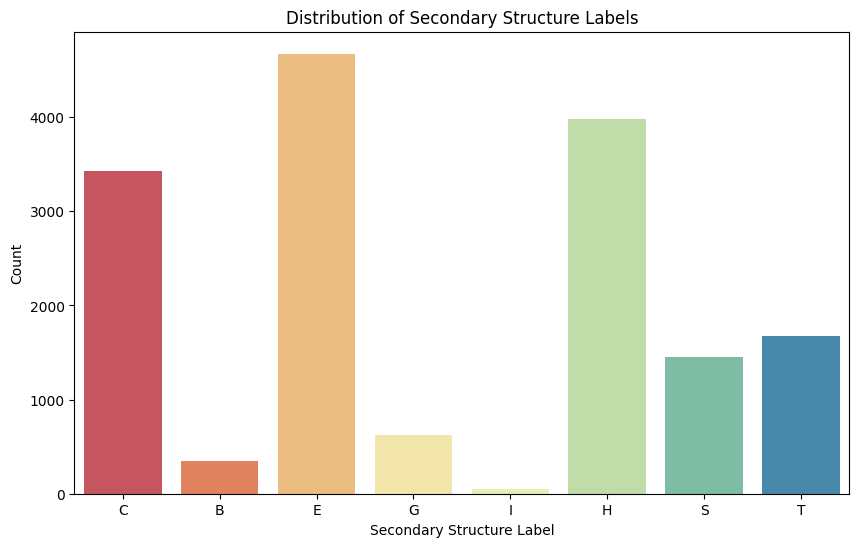

In [23]:
# Plot the distribution of secondary structure labels
def plot_distribution(df_counts):
    """
    Plot the distribution of secondary structure labels
    """
    for i, label in enumerate(secondary_structure_labels):
        n = df_counts[df_counts['label'] == label]['counts'].values[0]
        print(f'{label}: {n}')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='label',
                y='counts',
                palette='Spectral',
                hue='label',
                data=df_counts)
    plt.title('Distribution of Secondary Structure Labels')
    plt.xlabel('Secondary Structure Label')
    plt.ylabel('Count')
    plt.show()

plot_distribution(df_counts)